<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/SVM_(Algoritmo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)
---


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-yellow.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkblue.svg)](https://daniel-s-amador.medium.com/)




**Máquina de Vetores de Suporte**, em uma tradução livre, é um algoritmo utilizado para resolver problemas de **classificação** com **aprendizado supervisionado**.

![support](https://image.freepik.com/fotos-gratis/executivo-novo-que-trabalha-com-auriculares-e-portatil_1098-3091.jpg)

O algoritmo tem esse nome pois utiliza **vetores de suporte** como sua base e, esses vetores são a base de sua arquitetura.
* Os vetores são **pontos de referência** entre os dados.
* Os vetores têm esse nome por estarem mais próximos a cada classe.
* A partir dos vetores o **SVM** consegue criar uma **fronteira** que melhor separa os dados, Essa fronteira é o próprio SVM.

O algoritmo inicia traçando **hiperplanos**, que são linhas que tentam separar os dados. Na imagem abaixo representados por **A**, **B** e **C**. 
* Os pontos - *circulo e estrela* - marcados com traço preto são os dados que estão na fronteira (margem) entre os dados e são utilizados como os vetores de suporte por isso.
* O *SVM* irá tentar encontrar dentre os *hiperplanos* o que melhor separa os dados. Isso será feito tentando manter o máximo de distância possível de forma igualitária entres os dados:
    * **A** está mais próximo dos dados **circulos vermelhos**.
    * **B** está mais próximo dos dados **estrelas azuis**.
    * **C** está exatamente no meio do caminho entre os dados, por isso será utilizado como o **SVM**.

![imagem](https://minerandodados.com.br/wp-content/uploads/2018/04/algoritmo_SVM_margens_01.png)

Utilizaremos a base de dados **Iris** por sua facilidade em trabalhar com ela sem pensar em outras partes da **Ciência de Dados** como pré-processamento etc. Já usamos essa base de dados com os algoritmos: [K-Means](https://bit.ly/3cNfDG4), [KNN](https://bit.ly/34vtr4v) e [Árvore de Decisão](https://bit.ly/2Guqmcd).

Caso tenha interesse em ver algo **mais complexo** com o **SVM**, veja o **Classificador Spotify** [aqui](https://bit.ly/3l44ELf).

## Checklist
1. Importação e Visualização dos Dados
2. Machine Learning
3. Validação

# 1. Importação e Visualização dos Dados

**Importação das bibliotecas**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

**Leitura da base de dados**

In [ ]:
from sklearn import datasets
iris=datasets.load_iris()

**Nome das features**

Se você já passou pela [Árvore de Decisão](https://bit.ly/2Guqmcd) você já conheceu nossa base de dados, atributos e como a usaremos.

Vamos só conferir se está tudo certo abaixo

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Tipo da base de dados**

In [ ]:
type(iris)

sklearn.utils.Bunch

**Nome das classes**

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Separando dados de treino e classe**

In [ ]:
treino,classes=iris.data,iris.target

**Visualizando tipo dos dados após separação**

In [ ]:
type(treino),type(classes)

(numpy.ndarray, numpy.ndarray)

**Visualizando a forma do array dos dados de treino (formato linha, coluna)**

In [ ]:
treino.shape

(150, 4)

**Visualizando dados de treino**

In [ ]:
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

**Visualizando a forma do array dos dados classe (formato linha, coluna)**

In [ ]:
classes.shape

(150,)

**Visualizando os dados de classe**

In [ ]:
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Visualizandos os dados únicos de treino** ( com formato de 1 coluna) **e classe**

In [ ]:
set(treino.reshape((-1))), set(classes)

({0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  1.0,
  1.1,
  1.2,
  1.3,
  1.4,
  1.5,
  1.6,
  1.7,
  1.8,
  1.9,
  2.0,
  2.1,
  2.2,
  2.3,
  2.4,
  2.5,
  2.6,
  2.7,
  2.8,
  2.9,
  3.0,
  3.1,
  3.2,
  3.3,
  3.4,
  3.5,
  3.6,
  3.7,
  3.8,
  3.9,
  4.0,
  4.1,
  4.2,
  4.3,
  4.4,
  4.5,
  4.6,
  4.7,
  4.8,
  4.9,
  5.0,
  5.1,
  5.2,
  5.3,
  5.4,
  5.5,
  5.6,
  5.7,
  5.8,
  5.9,
  6.0,
  6.1,
  6.2,
  6.3,
  6.4,
  6.5,
  6.6,
  6.7,
  6.8,
  6.9,
  7.0,
  7.1,
  7.2,
  7.3,
  7.4,
  7.6,
  7.7,
  7.9},
 {0, 1, 2})

**Redimensionando os dados de treino**

In [ ]:
treino.reshape((-1)).ndim

1

**Plotando o gráfico de dispersão dos dados com relação à classe**

Dispersão dos dados de Sepal width e Sepal lenght com as classes (0,1,2)

<IPython.core.display.Javascript object>


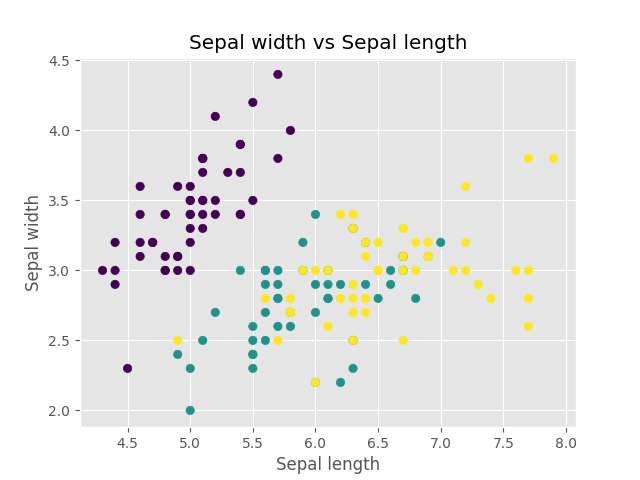

In [ ]:
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1],c=classes); #parâmetro c é de color, para colorir pelas classes

**Plotando o gráfico de dispersão dos dados com relação à classe**

Dispersão dos dados de Petal width e Petal lenght com as classes (0,1,2).

Veja como esse atributos separam melhor os dados do que o **Sepal width** e **Sepal length**.

<IPython.core.display.Javascript object>


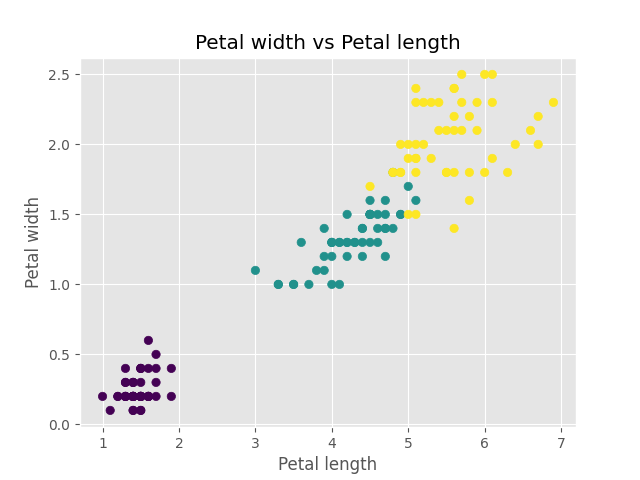

In [ ]:
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal width vs Petal length')
plt.scatter(treino[:,2],treino[:,3],c=classes);

**Está tudo correto, então vamos para o *Machine Learning***

# 2. Machine Learning

**Separando os dados em 80% treino e 20% teste**

Visualizando o tamanho dos dados de treino que será o passado para treino

* Tanto os dados das **features** quanto os de **classe** terão as mesmas **120 amostras** e serão utilizados para **treino**

* As **30 amostras** finais serão utilizadas para **teste**

In [ ]:
# pegando todos os dados menos os 30 últimos
len(treino[:-30]),len(classes[:-30])

(120, 120)

**Visualizando dados de treino**

In [ ]:
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Visualizando dados de classe correspondente**

In [ ]:
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Treinando o algoritmo com o método *SVC* que é o próprio SVM e visualizando o objeto *clf***

In [ ]:
# treinando 
clf=svm.SVC().fit(treino[:-30],classes[:-30])
# objeto clf
clf

SVC()

**Array com dados de teste**

Últimas **30 amostras**.

In [ ]:
teste=treino[-30:] # pegando os trinta últimos
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

**Predizendo com dados de teste**

In [ ]:
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

**Criando array com os dados reais**

In [ ]:
classes_teste=classes[-30:]
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

**Visualizando os resultados de classificação**

Serão passados **Sepal lenght**, **Sepal width** e **classe**.

Os pontos roxos são os pontos que o algoritmo errou.

<IPython.core.display.Javascript object>


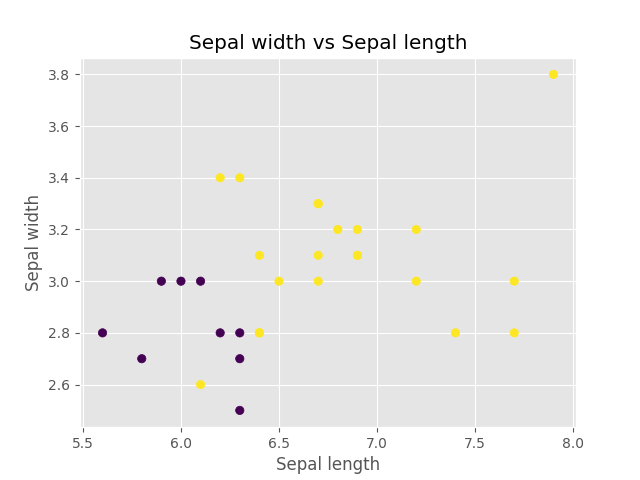

In [ ]:
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
# passando as últimas 30 linhas dos dados reais e colorindo com os dados preditos
plt.scatter(treino[-30:,0],treino[-30:,1],c=clf.predict(teste));

**Visualizando os resultados de classificação**

Serão passados **Petal lenght**, **Petal width** e **classe**.

Os pontos roxos são os pontos que o algoritmo errou.

Não dá para ver os mesmos 9 pontos da outra por só plotar 2 colunas e não 4.

<IPython.core.display.Javascript object>


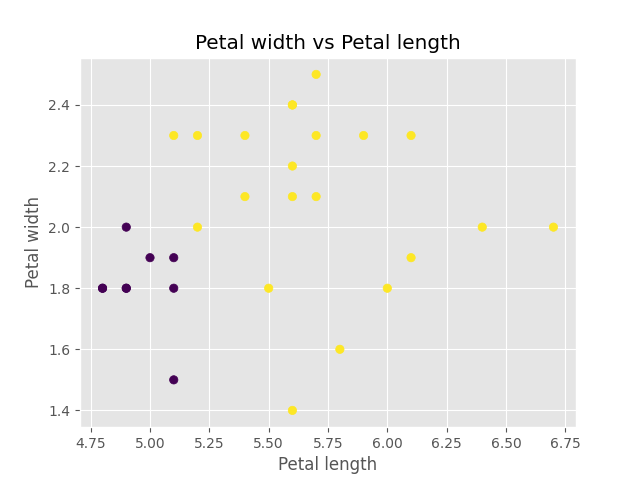

In [ ]:
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal width vs Petal length')
# passando as últimas 30 linhas dos dados reais e colorindo com os dados preditos
plt.scatter(treino[-30:,2],treino[-30:,3],c=clf.predict(teste));

**Gŕafico de instâncias e predição**

Aqui dá para visualizar novamente os 9 erros.

<IPython.core.display.Javascript object>


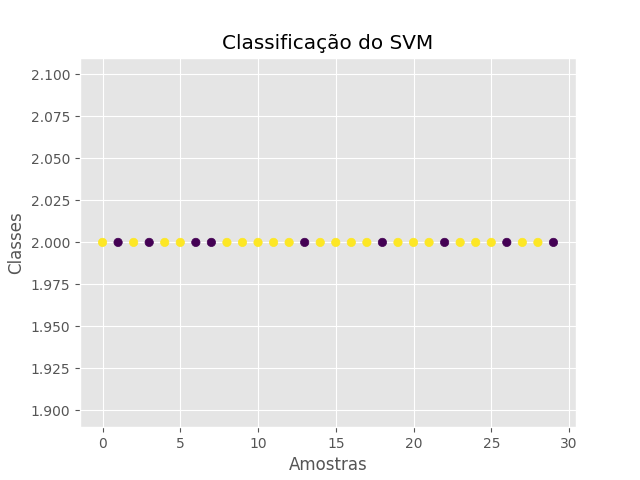

In [ ]:
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM')
# passando as últimas 30 linhas dos dados reais e colorindo com os dados preditos
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste));
# plotando as 30 linhas(len) de predição, classes de teste reais e colorindo com a predição
# gráfico = 0 até 30 amostras e classes 1 e 2

# 3. Validação

**Matriz de confusão**

Pela matriz o algoritmo acertou 21 e errou 9, contudo vamos ver os demais algoritmos para visualizar se esse resultado foi fiel.

In [ ]:
print(pd.crosstab(classes_teste,clf.predict(teste),rownames=['Real'], colnames=['Predito'], margins=True))

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30


**Criando função *Acuracia***

Com cross validation que faz uma gestão de validação melhor, evitando a variância.

Retorna a acurácia após validação cruzada.

In [ ]:
def Acuracia(clf,X,y):
    # x é os dados de treino e y os de classe
    resultados=cross_val_predict(clf,X,y,cv=10) # faz a validação cruzada
    return metrics.accuracy_score(y,resultados) # retorna a acurácia # recebe os valores reais (y) e os valores preditos por resultados
# chamando a função
Acuracia(clf,treino,classes)

0.9733333333333334

**Métricas de avaliação 'precisão, revocação e medida F1'**

Note que, após a **validação cruzada**, o resultado ficou bem significativo.

In [ ]:
resultados=cross_val_predict(clf,treino,classes,cv=10)
valor_classes=[0,1,2]

print(metrics.classification_report(classes,resultados,valor_classes)) # classes reais,predição, valores de classe

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Não sabe o que é **Cross Validation**, explico de forma breve nesta aula [aqui](https://bit.ly/30mKZ1q).

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-yellow.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkblue.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>